# Аналитика в авиакомпании

Задача: Для развития российской авиакомпании, которая выполняет внутренние пассажирские перевозки, требуется изучить предпочтения пользователей, покупающих билеты на разные направления.  

Входные данные: результаты запросов из базы данных об авиаперевозках - количество рейсов для каждой модели самолетов; о среднем количестве рейсов, прибывающих в каждый город за день.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-датасетах,-выявление-некорректных-данных." data-toc-modified-id="Изучение-общей-информации-о-датасетах,-выявление-некорректных-данных.-1">Изучение общей информации о датасетах, выявление некорректных данных.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1">Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Топ-10-городов-по-количеству-рейсов:" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов:-2.1">Топ-10 городов по количеству рейсов:</a></span></li><li><span><a href="#Графики-зависимости-количества-рейсов-от-модели-самолета,-города-и-распределение-количества-рейсов-в-топ-10-городах." data-toc-modified-id="Графики-зависимости-количества-рейсов-от-модели-самолета,-города-и-распределение-количества-рейсов-в-топ-10-городах.-2.2">Графики зависимости количества рейсов от модели самолета, города и распределение количества рейсов в топ-10 городах.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3">Вывод</a></span></li></ul></div>

Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

Уберем прокрутку вывода результатов ячейки

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Изучение общей информации о датасетах, выявление некорректных данных.

Изучим общую информацию о датасетах

In [4]:
dfs = {'model_flights': model_flights,
       'city_flights': city_flights}

In [5]:
for key in dfs:
    print(key)
    print('====================')
    print(dfs[key].info())
    print()
    display(dfs[key].sample(8))
    print()
    print(dfs[key].describe())
    print()
    print('Кол-во дубликатов: ', dfs[key].duplicated().sum())
    print()
    print('====================')

model_flights
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None



,model,flights_amount
3,Boeing 767-300,600
6,Cessna 208 Caravan,4557
4,Boeing 777-300,300
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
5,Bombardier CRJ-200,4446
0,Airbus A319-100,607



       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000

Кол-во дубликатов:  0

city_flights
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None



,city,average_flights
6,Белгород,6.000000
90,Ухта,3.000000
86,Усинск,1.000000
28,Кемерово,2.000000
11,Бугульма,3.000000
16,Воронеж,2.000000
33,Красноярск,11.580645
34,Курган,3.419355



       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194

Кол-во дубликатов:  0



### Вывод

В нашем распоряжении два датасета с количествами полетов в зависимости от 1) модели самолета; 2) города прибытия рейса.
Видим, что в первом датасете содержится информация о 8 моделях самолетов, во втором - о 101 городе. 
В изучаемых датасетах нет пропусков, нет дубликатов. Типы данных корректны.
Судя по статистикам, разброс по количеству полетов по разным моделям и по разным городам очень большой.

## Исследовательский анализ данных

### Топ-10 городов по количеству рейсов:

In [6]:
flights_top10_cities = city_flights.sort_values(by='average_flights', ascending=False)[0:10].reset_index(drop=True)
flights_top10_cities

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


In [7]:
top10_cities = flights_top10_cities['city'].tolist()
top10_cities

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Красноярск',
 'Екатеринбург',
 'Ростов-на-Дону',
 'Пермь',
 'Брянск',
 'Сочи',
 'Ульяновск']

Ожидаемо, лидер по количеству рейсов - Москва, на втором месте Санкт-Петербург, а остальной топ10 составляют крупные региональные центра РФ.

### Графики зависимости количества рейсов от модели самолета, города и распределение количества рейсов в топ-10 городах.

In [8]:
def barplot_creator(figsize, data, x_col, y_col, palette, x_label, y_label, fig_title, angle):
    plt.figure(figsize=figsize)
    sns.barplot(data=data, x=x_col, y=y_col, palette=palette)#, orient=orient)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(fig_title)
    plt.xticks(rotation=angle)
    plt.show()

График зависимости количества рейсов от модели самолета:

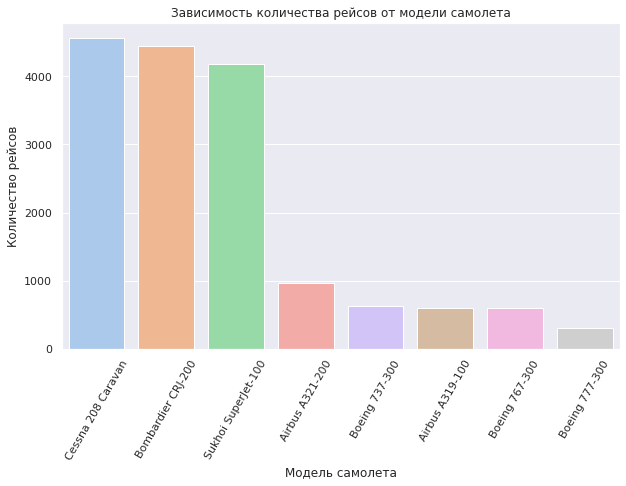

In [9]:
barplot_creator((10,6), model_flights.sort_values(by='flights_amount', ascending=False), 'model', 'flights_amount', "pastel", 
                'Модель самолета', 'Количество рейсов', 'Зависимость количества рейсов от модели самолета', 60)

Видим, что топ-3 почти с равным колчеством рейсов занимают Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.
На остальных моделях самолетов выполняется в разы меньше рейсов.

График зависимости количества рейсов от города:

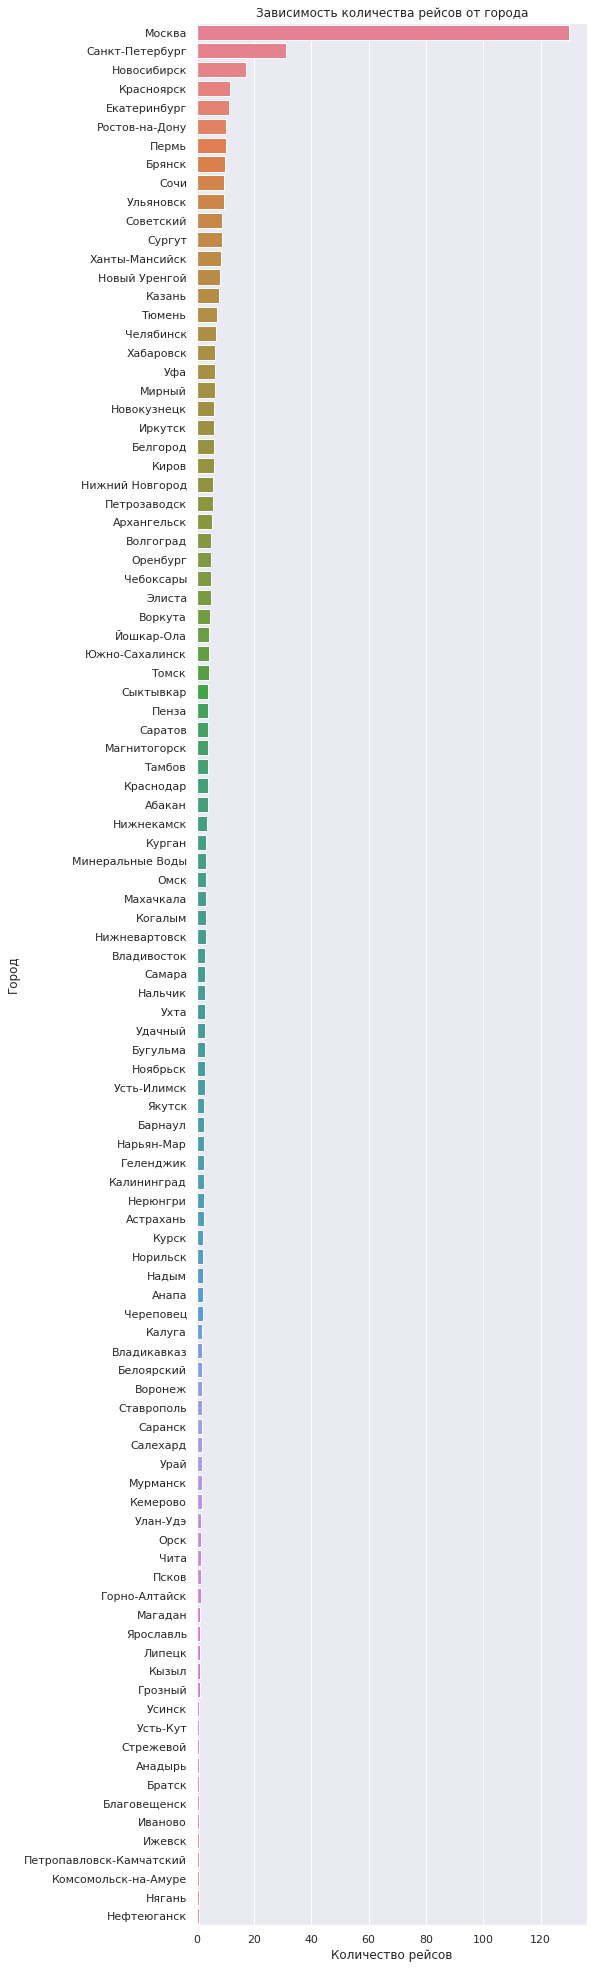

In [10]:
barplot_creator((7,35), city_flights.sort_values(by='average_flights', ascending=False),'average_flights', 'city', "husl", 
                'Количество рейсов', 'Город', 'Зависимость количества рейсов от города', 0)

Видим очень большое количество городов с очень маленьким средним количеством рейсов в день.  
Построим гистограмму распределения количества рейсов в топ-10 городах. 
И объединим все города, которые не вошли в список Топ-10 по среднему количеству рейсов в день, в категорию 'Другие'.

In [11]:
city_flights['category'] = city_flights['city']
for index, row in city_flights.iterrows():
    if row['city'] not in top10_cities:
        city_flights.loc[index, 'category'] = 'Другие'

In [12]:
city_flights.sort_values(by='average_flights', ascending=False).head(15)

,city,average_flights,category
43,Москва,129.774194,Москва
70,Санкт-Петербург,31.161290,Санкт-Петербург
54,Новосибирск,17.322581,Новосибирск
33,Красноярск,11.580645,Красноярск
20,Екатеринбург,11.322581,Екатеринбург
67,Ростов-на-Дону,10.193548,Ростов-на-Дону
63,Пермь,10.129032,Пермь
10,Брянск,10.000000,Брянск
74,Сочи,9.612903,Сочи
84,Ульяновск,9.580645,Ульяновск


In [13]:
city_flights_grouped = city_flights.pivot_table(index='category', values='average_flights', aggfunc='sum').reset_index()

In [14]:
city_flights_grouped

,category,average_flights
0,Брянск,10.000000
1,Другие,304.235681
2,Екатеринбург,11.322581
3,Красноярск,11.580645
4,Москва,129.774194
5,Новосибирск,17.322581
6,Пермь,10.129032
7,Ростов-на-Дону,10.193548
8,Санкт-Петербург,31.161290
9,Сочи,9.612903


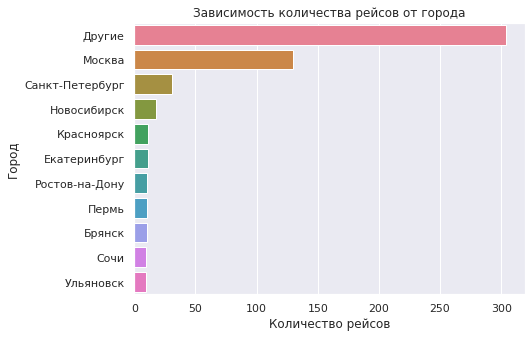

In [15]:
barplot_creator((7,5), city_flights_grouped.sort_values(by='average_flights', ascending=False),'average_flights', 'category', "husl", 
                'Количество рейсов', 'Город', 'Зависимость количества рейсов от города', 0)

На гистограмме видно, насколько большой долей рейсов обладает Москва. Среднее количество рейсов в день, прилетающих в Москву, составляет примерно 40% от среднего количества рейсов в день всех городов, не вошедших в Топ-10, это 91 город. Столица является крупным авиа хабом в нашей стране.

## Вывод

В лидерах по количеству рейсов целых три моднли самолетов: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.  
Москва с огромным отрывом лидирует по среднему количеству прилетающих рейсов в день, что ожидаемо, т.к. 1) это столица; 2) в городе сразу несколько аэропортов, а не 1. Москва - это крупный авиа хаб нашей страны